In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [3]:
voice=pd.read_csv("voice-classification.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [6]:
voice.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## checking for outliers

meanfreq


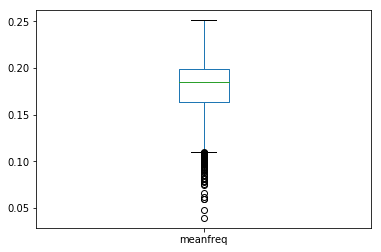

sd


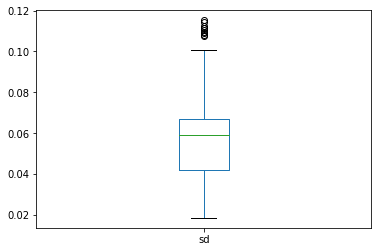

median


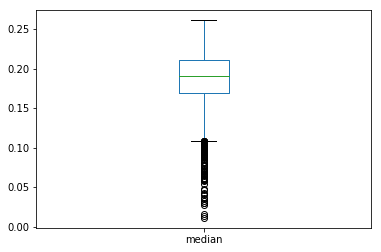

Q25


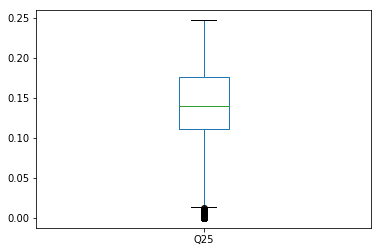

Q75


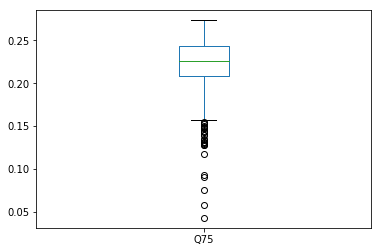

IQR


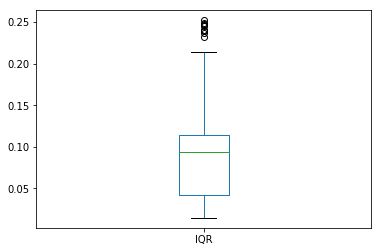

skew


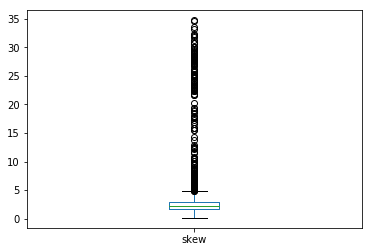

kurt


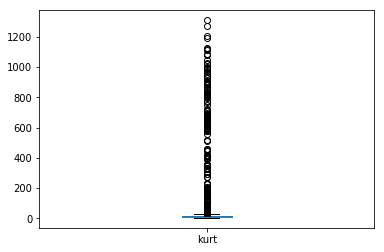

sp.ent


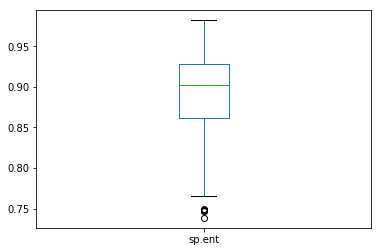

sfm


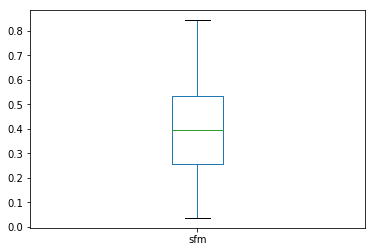

mode


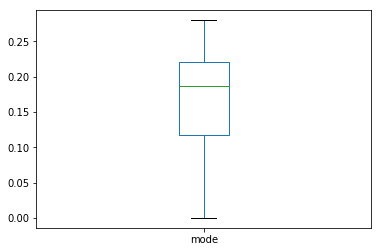

centroid


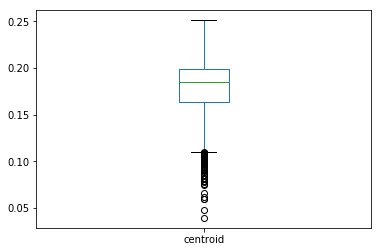

meanfun


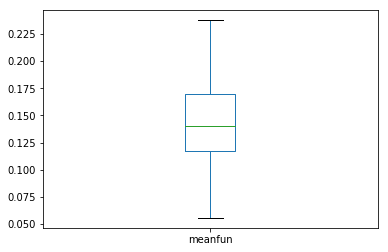

minfun


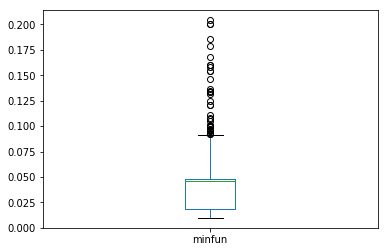

maxfun


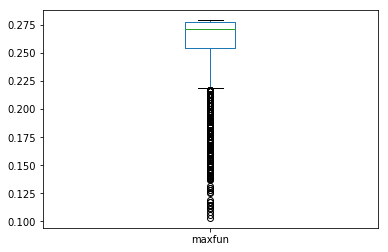

meandom


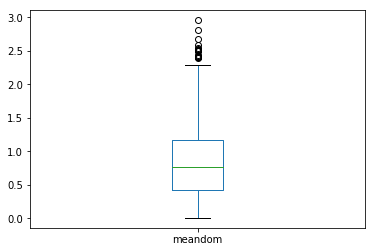

mindom


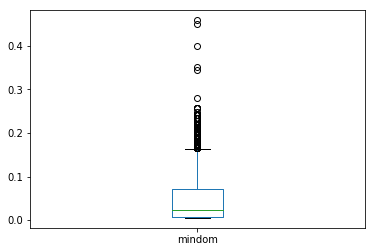

maxdom


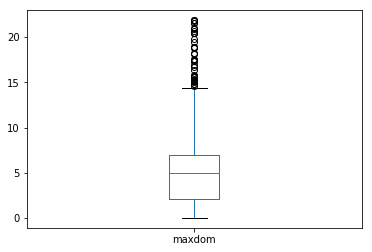

dfrange


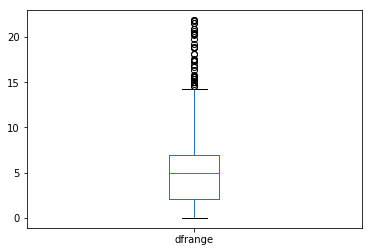

modindx


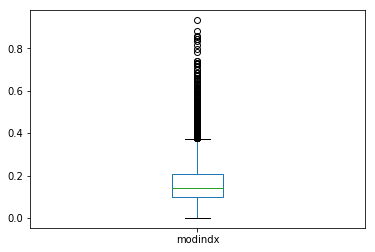

In [7]:
for i in voice.columns:
    if (i != "label"):
        print(i)
        voice[i].plot(kind="box")
        plt.show()

In [8]:
voice.shape

(3168, 21)

## removing the outliers  and checking the shape  

In [9]:
for i in voice.columns:
    if (i != "label"):

        q1=voice[i].quantile(0.25)
        q3=voice[i].quantile(0.75)
        iqr=(q3-q1)

        voice=voice[((voice[i]>=(q1 - 1.5 * iqr)) & (voice[i]<= (q3 + 1.5 * iqr)))]

In [10]:
voice.shape

(1607, 21)

In [11]:
voice["label"].value_counts()

male      822
female    785
Name: label, dtype: int64

In [12]:
le=preprocessing.LabelEncoder()
voice["label"]=le.fit_transform(voice["label"])
voice["label"].head(3)

3    1
4    1
5    1
Name: label, dtype: int32

In [13]:
voice["label"].value_counts()

1    822
0    785
Name: label, dtype: int64

In [14]:
#  1-> male,0-> female

In [15]:
scaler = MinMaxScaler()

norm_voice= pd.DataFrame(scaler.fit_transform(voice))

In [16]:
norm_voice.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.172991,0.666634,0.319275,0.286619,0.405457,0.529713,0.257457,0.097244,0.936483,0.871110,...,0.172991,0.115124,0.042653,0.458465,0.059863,0.04,0.026203,0.026231,0.918202,1.0
1,0.029950,0.766334,0.090862,0.199070,0.387108,0.618856,0.221694,0.105317,0.978554,0.947192,...,0.029950,0.227895,0.030264,0.768474,0.290590,0.04,0.363102,0.363490,0.761240,1.0
2,0.009223,0.772155,0.052744,0.146319,0.421175,0.698820,0.447527,0.310506,0.935795,0.886067,...,0.009223,0.252050,0.032854,0.532276,0.103509,0.04,0.174332,0.174518,0.425399,1.0


In [17]:
norm_voice.columns=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","spent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
norm_voice.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.172991,0.666634,0.319275,0.286619,0.405457,0.529713,0.257457,0.097244,0.936483,0.871110,...,0.172991,0.115124,0.042653,0.458465,0.059863,0.04,0.026203,0.026231,0.918202,1.0
1,0.029950,0.766334,0.090862,0.199070,0.387108,0.618856,0.221694,0.105317,0.978554,0.947192,...,0.029950,0.227895,0.030264,0.768474,0.290590,0.04,0.363102,0.363490,0.761240,1.0
2,0.009223,0.772155,0.052744,0.146319,0.421175,0.698820,0.447527,0.310506,0.935795,0.886067,...,0.009223,0.252050,0.032854,0.532276,0.103509,0.04,0.174332,0.174518,0.425399,1.0


In [18]:
norm_voice.var()

meanfreq    0.042272
sd          0.042233
median      0.034282
Q25         0.037447
Q75         0.032922
IQR         0.042737
skew        0.030305
kurt        0.036604
spent       0.041271
sfm         0.048906
mode        0.046348
centroid    0.042272
meanfun     0.033010
minfun      0.033927
maxfun      0.038269
meandom     0.042597
mindom      0.019938
maxdom      0.037076
dfrange     0.037120
modindx     0.034805
label       0.250023
dtype: float64

In [19]:
norm_voice.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.729498,0.882289,0.892568,0.669406,-0.610766,0.163673,0.031504,-0.803732,-0.847638,...,1.000000,0.564104,0.407564,0.382351,0.418939,0.210347,0.426194,0.425619,-0.269981,-0.428777
sd,-0.729498,1.000000,-0.493688,-0.826082,-0.055964,0.853061,-0.328060,-0.204729,0.858863,0.861697,...,-0.729498,-0.543437,-0.320655,-0.232685,-0.408478,-0.183609,-0.436010,-0.435538,0.258229,0.574627
median,0.882289,-0.493688,1.000000,0.693264,0.652249,-0.406819,0.093950,-0.032142,-0.634516,-0.681446,...,0.882289,0.486742,0.369587,0.339116,0.316145,0.186768,0.321079,0.320542,-0.210344,-0.323803
Q25,0.892568,-0.826082,0.693264,1.000000,0.366786,-0.879955,0.363099,0.229878,-0.830376,-0.787312,...,0.892568,0.666767,0.236268,0.273498,0.354970,0.191539,0.388328,0.387805,-0.216721,-0.648893
Q75,0.669406,-0.055964,0.652249,0.366786,1.000000,0.119194,-0.214481,-0.266582,-0.265481,-0.383873,...,0.669406,0.162138,0.314267,0.316820,0.233334,0.112425,0.200829,0.200509,-0.151316,0.089192
IQR,-0.610766,0.853061,-0.406819,-0.879955,0.119194,1.000000,-0.497042,-0.381467,0.750654,0.644237,...,-0.610766,-0.628813,-0.091678,-0.130109,-0.259691,-0.147011,-0.311892,-0.311496,0.154027,0.738078
skew,0.163673,-0.328060,0.093950,0.363099,-0.214481,-0.497042,1.000000,0.952868,-0.519739,-0.258511,...,0.163673,0.369966,-0.113447,-0.087134,-0.001191,-0.005345,0.073965,0.074019,-0.034842,-0.431815
kurt,0.031504,-0.204729,-0.032142,0.229878,-0.266582,-0.381467,0.952868,1.000000,-0.358597,-0.117377,...,0.031504,0.265299,-0.167008,-0.133476,-0.052477,-0.028370,0.010696,0.010806,0.028751,-0.344828
spent,-0.803732,0.858863,-0.634516,-0.830376,-0.265481,0.750654,-0.519739,-0.358597,1.000000,0.895766,...,-0.803732,-0.624880,-0.354297,-0.246215,-0.370333,-0.186214,-0.423439,-0.422952,0.280843,0.553049
sfm,-0.847638,0.861697,-0.681446,-0.787312,-0.383873,0.644237,-0.258511,-0.117377,0.895766,1.000000,...,-0.847638,-0.459239,-0.412104,-0.295561,-0.405287,-0.193884,-0.424877,-0.424362,0.313021,0.389066


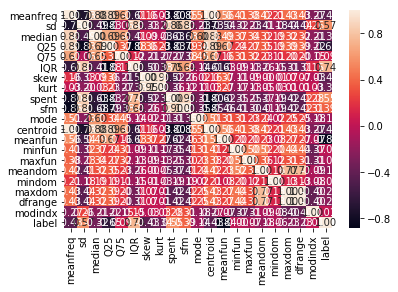

In [20]:
sb.heatmap(norm_voice.corr(),annot=True,fmt=".2f")

In [52]:
feature=norm_voice.loc[:,["meanfreq","sd","skew","kurt","IQR","meanfun"]]
dependent=norm_voice.loc[:,["label"]]
voice_train,voice_test,label_train,label_test=train_test_split(feature,dependent,test_size=0.30,random_state=0)
display(voice_train.shape)
display(voice_test.shape)

(1124, 6)

(483, 6)

In [55]:
mod=LogisticRegression()

mod.fit(voice_train,label_train)
print("train accuracy")
display(mod.score(voice_train,label_train))

print("test accuracy")
display(mod.score(voice_test,label_test))

train accuracy


0.9653024911032029

test accuracy


0.9710144927536232

In [56]:
train_prediction=mod.predict(voice_train)
test_prediction=mod.predict(voice_test)
train_conf_matrix=confusion_matrix(label_train,train_prediction)
test_conf_matrix=confusion_matrix(label_test,test_prediction)

In [57]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,525,30
1.0,9,560


In [58]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,219,11
1.0,3,250


In [59]:
print(classification_report(label_train,train_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       555
         1.0       0.95      0.98      0.97       569

   micro avg       0.97      0.97      0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124



In [31]:
print(classification_report(label_test,test_prediction))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       230
         1.0       0.96      0.99      0.97       253

   micro avg       0.97      0.97      0.97       483
   macro avg       0.97      0.97      0.97       483
weighted avg       0.97      0.97      0.97       483



## in logistic regression we got train accuracy 96.5% and test accuracy 97.1%

In [32]:
# decision tree algorithm 

model=DecisionTreeClassifier()

model.fit(voice_train,label_train)
print("train accuracy")
display(model.score(voice_train,label_train))

print("test accuracy")
display(model.score(voice_test,label_test))

train accuracy


1.0

test accuracy


0.9730848861283644

In [60]:
# using min_sample_split and min_impurity_decrease

model1=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

model1.fit(voice_train,label_train)
print("train accuracy")
display(model1.score(voice_train,label_train))

print("test accuracy")
display(model1.score(voice_test,label_test))

train accuracy


0.9759786476868327

test accuracy


0.9565217391304348

In [61]:
model2=DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)


model2.fit(voice_train,label_train)
print("train accuracy")
display(model2.score(voice_train,label_train))

print("test accuracy")
display(model2.score(voice_test,label_test))

train accuracy


0.9661921708185054

test accuracy


0.9440993788819876

## when  using min_sample_split and min_impurity_decrease the accuracy  goes down comparing with model 1 without using min_sample_split and min_impurity

In [62]:
# k nearest algorithm    only including DB AND TB since they are correlated with class 


kmodel=KNeighborsClassifier(n_neighbors=3,metric="euclidean")


kmodel.fit(voice_train,label_train)
print("train accuracy")
display(kmodel.score(voice_train,label_train))

print("test accuracy")
display(kmodel.score(voice_test,label_test))

train accuracy


0.9848754448398577

test accuracy


0.9855072463768116

In [63]:
# changing the n_neighbors value to 5 and validating it


k1model=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
k1model.fit(voice_train,label_train)
print("train accuracy")
display(k1model.score(voice_train,label_train))

print("test accuracy")
display(k1model.score(voice_test,label_test))

train accuracy


0.9786476868327402

test accuracy


0.9772256728778468

In [ ]:
# accuracy decreases when we are increasing the  n_neighbors

In [64]:
# support vector machine


smodel=SVC(kernel="rbf")
smodel.fit(voice_train,label_train)
print("train accuracy")
display(smodel.score(voice_train,label_train))

print("test accuracy")
display(smodel.score(voice_test,label_test))


train accuracy


0.9741992882562278

test accuracy


0.9772256728778468

## from this four algorithm we can say that KNearestNeighbors algorithm and logistic regression are giving highest accuracy compared to other algorithms